# 9.3

In [2]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as pp
%matplotlib inline

the svm library assumes libsvm.so.2 is located in the above directory (is accessible in svm.py using "../libsvm.so.2")

In [14]:
from svm import *
from svmutil import *
prob = svm_problem([1,-1], [{1:1, 3:1}, {1:-1, 3:-1}])
param = svm_parameter('-c 4')
m = libsvm.svm_train(prob, param)
x0, max_idx = gen_svm_nodearray({1:1, 3:1})
label = libsvm.svm_predict(m, x0)

### generate test data

(80, 3) data
(80, 3) data


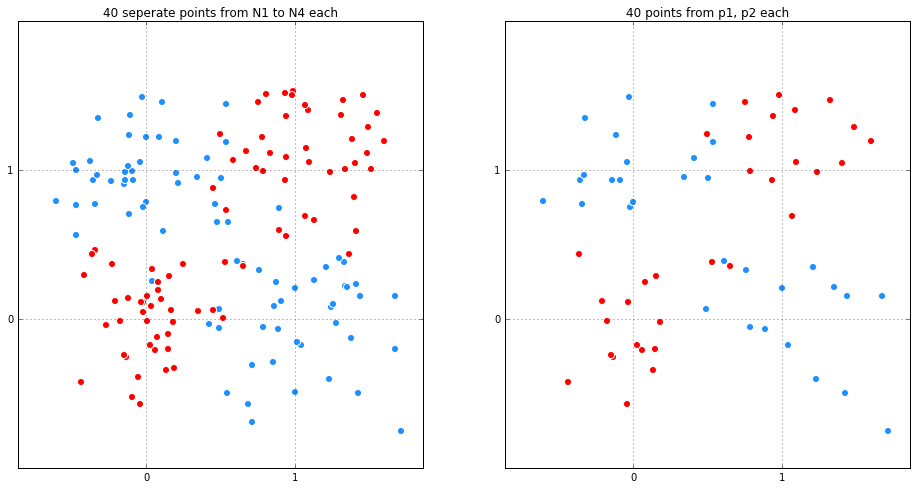

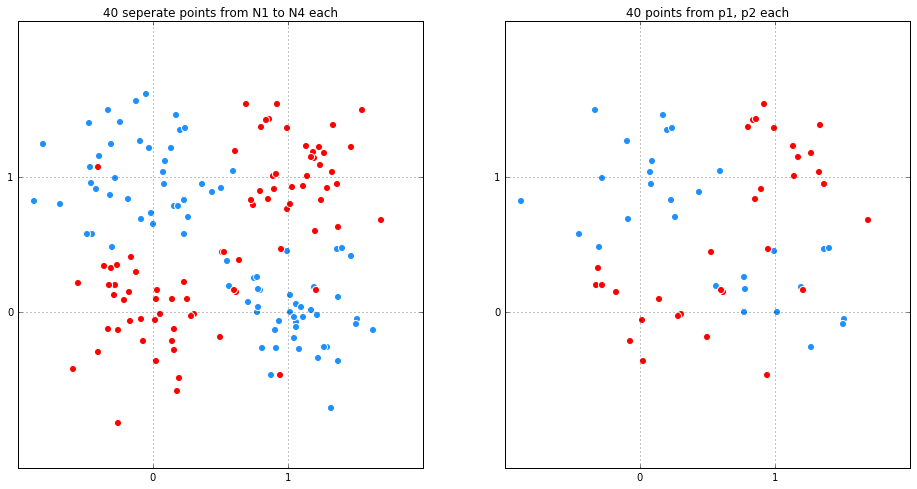

In [168]:
def scatter(data, color="dodgerblue", markers = None):
    pp.scatter(data[:,0], data[:,1], s=50, c=color, edgecolor="white")
    return

def newplot(i=1, title=""):
    if (i == 1):
        pp.figure(figsize=(16,8))
    pp.subplot(1,2,i)
    if title != "":
        pp.title(title)
    pp.axis('equal')
    pp.xticks([0, 1])
    pp.yticks([0, 1])
    pp.xlim([-1, 2])
    pp.ylim([-1, 2])
    pp.grid()
    return

def grid(min_x, max_x, n=100):
    line = np.linspace(min_x, max_x, n)
    X = np.array(np.meshgrid(line, line))  # (dims, n, n)
    Xpoints = np.vstack([X[0,:,:].reshape(n**2), X[1,:,:].reshape(n**2)]).T  # (n*n, dims)
    return X, Xpoints

def gen_data(n=80, std=np.sqrt(0.1)):
    n = int(n/2)
    X1 = np.vstack([np.random.normal(0, std, n), np.random.normal(1, std, n)])
    X2 = np.vstack([np.random.normal(1, std, n), np.random.normal(0, std, n)])

    X3 = np.vstack([np.random.normal(0, std, n), np.random.normal(0, std, n)])
    X4 = np.vstack([np.random.normal(1, std, n), np.random.normal(1, std, n)])

    newplot(1, str(n) + " seperate points from N1 to N4 each")
    for X in [X1, X2]:
        scatter(X.T)
    for X in [X3, X4]:
        scatter(X.T, "red")

    newplot(2, str(n) + " points from p1, p2 each")
    Xp1 = np.hstack([X1, X2]).T
    Xp1 = Xp1[np.random.choice(n*2, n), :]
    # scatter(Xp1)
    Xp2 = np.hstack([X3, X4]).T
    Xp2 = Xp2[np.random.choice(n*2, n), :]
    # scatter(Xp2, "red")

    Y = np.hstack([-np.ones(n), np.ones(n)])
    data = np.vstack([np.hstack([Xp1.T, Xp2.T]), Y]).T
    scatter(data[data[:,2]==-1])
    scatter(data[data[:,2]==1], "red")
    print(data.shape, "data")
    return data

dataset = gen_data(80)
testset = gen_data(80)

### train with RBF-Kernel (default parameters), visualize results

parameter description for svm_train:

predicting Xtest labels
Accuracy = 92.5% (74/80) (classification)

predicting labels for decision boundary
Accuracy = 0% (0/90000) (classification)


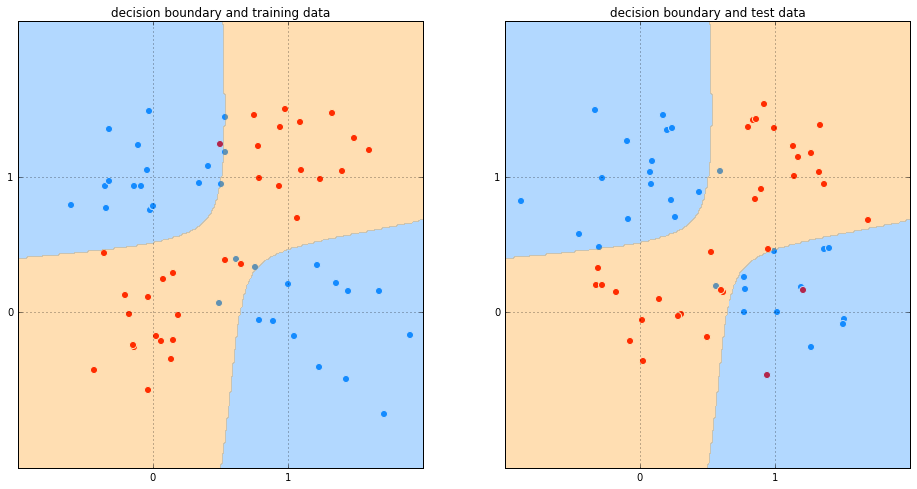

In [169]:
def ex93a(dataset=dataset, testset=testset):
    Ytrain = dataset[:,2]
    Xtrain = dataset[:,:2]
    Xtest = testset[:,:2]
    Ytest = testset[:,2]
    
    # (a) TRAIN MODEL
    # 1/2 = (default gamma) != (datagen gamma) = 1/(2(std**2)) = 1/0.2 = 5
    # i.e. you should get better results with '-g 5'
    m = svm_train(Ytrain.tolist(), Xtrain.tolist(), '-t 2')
    
    # (b) PREDICT LABELS
    print("predicting Xtest labels")
    p_labs, p_acc, p_vals = svm_predict(Ytest.tolist(), Xtest.tolist(), m)
    labels = np.array(p_labs)

    # (c) PLOT RESULTS
    # calc decision boundary
    n = 300
    X, X_ = grid(-1.2, 2.2, n)
    print("\npredicting labels for decision boundary")
    p_labs, p_acc, p_vals = svm_predict([0]*(n*n), X_.tolist(), m)
    grid_labels = np.array(p_labs).reshape((n,n))
    
    newplot(1, "decision boundary and training data")
    scatter(Xtrain[Ytrain==-1.0,:], "dodgerblue")
    scatter(Xtrain[Ytrain==1.0,:], "red")
    pp.contourf(X[0,:,:], X[1,:,:], grid_labels, alpha=0.3, levels=[-1, 0, 1.])
    
    newplot(2, "decision boundary and test data")
    scatter(Xtest[Ytest==-1.0,:2], "dodgerblue")
    scatter(Xtest[Ytest==1.0,:2], "red")
    pp.contourf(X[0,:,:], X[1,:,:], grid_labels, alpha=0.3, levels=[-1, 0, 1.])
    return

ex93a()